# **Importação das Bibliotecas**
    - pandas para processamento do dataframe
    - matplotlib para confecção dos gráficos
    - inflection para manipulação de strings


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import inflection 

# Usando a cláusula ''as'' para renomear a biblioteca, exceto a inflection por será usada uma única vez.

# ------------------------------------------------------------------------------------------

# **Carregamento dos Dados**
**1. Leia o arquivo googleplaystore.csv e realize a seguinte atividade sobre o dataset utilizando as bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas.**   

    - carregando os dados para a variável df
    - fazendo uma cópia de segurança para a variável df1
    - verificando a operação executada com df1.head()

In [43]:
df = pd.read_csv('googleplaystore.csv') # lendo o arquivo de dados e armazenando em df (dataframe)

In [44]:
df1 = df.copy() # Fazendo uma cópia de segurança do df para a variável df1

In [45]:
df1.head() # Verificando a operação executada. A função head(), por padrão, mostra as 5 primeiras linhas

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# ------------------------------------------------------------------------------------------

# Definindo Duas Funções Auxiliares
    - rename_colums(dataframe) para tratar os nomes das colunas e deixar no padrao 'nome_da_coluna'
    - remove_duplicatas(dataframe) para remover as linhas duplicadas do data set

In [46]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

In [47]:
def remove_duplicatas(dataframe):
    duplicado = df1.duplicated()
    linhas_nao_duplicadas = duplicado == False
    dataframe = dataframe.loc [ linhas_nao_duplicadas, :]
    return dataframe.reset_index(drop = True) ## Drop = True serve para derrubar a coluna com o índice antigo

# ------------------------------------------------------------------------------------------

# **Início do Tratamento**
    - renomeando os títulos das colunas
    - verificando as dimensões do dataframe
    - verificando as linhas duplicadas
    - removendo as linhas duplicadas
    - verificando as novas dimensões do dataframe
    - verificando os tipos de cada coluna

In [48]:
df1 = rename_columns(df1) #renomeando as colunas por boa prática para que se evite divergências nas consultas
df1

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [49]:
df1.shape # <df>.shape é usado para visualizar as dimensões do dataframe. Retorna uma tupla no formato (linhas, colunas)

(10841, 13)

In [50]:
duplicado = df1.duplicated() #verificando quais são as linhas duplicadas
df1.loc[duplicado, :]
# o retorno foi um dataframe 483 rows × 13 columns, portanto são 483 linhas duplicadas.

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [57]:
df1 = remove_duplicatas(df1) #removendo as linhas duplicadas
df1.reset_index(drop = True)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [58]:
df1.shape #verificando as novas dimensões do dataframe

(10358, 13)

**Linhas removidas = 10841 - 10358 = 483**  
Em conformidade com o resultado esperado.

In [54]:
df1.dtypes #verificando os tipos das colunas

app                object
category           object
rating            float64
reviews            object
size               object
installs           object
type               object
price              object
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

# ------------------------------------------------------------------------------------------

# **Verificação dos valores únicos de cada coluna para buscar inconsistências**
    - procurando valores únicos de cada coluna para buscar inconsistências
    - uso da função unique() -> df.loc[:, 'coluna'].unique()

In [82]:
for coluna in (df1.columns):
   print( coluna ,':\n', df1.loc[:, coluna].unique(), end = '\n\n' )

app :
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

category :
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

rating :
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

reviews :
 ['159' '967' '87510' ... '603' '1195' '

# **Identificada uma linha com divergência**  
    - observando os dados, concluí que a linha está com as colunas deslocadas para a esquerda
    - optei por fazer a exclusão da linha

In [88]:
df1.loc[df1['category'] == '1.9', :] #Linha com divergência

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# **Excluindo a linha com divergência** 

In [92]:
df1 = df1.loc[df1['category'] != '1.9', :] #exclusão da linha divergente

# ------------------------------------------------------------------------------------------

# **Verificação dos tipos únicos de cada coluna e suas quantidades**

In [93]:
for coluna in (df1.columns): #valores únicos explícitos de cada coluna
   print( coluna ,':\n', df1.loc[:, coluna].unique(), end = '\n\n' )

app :
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

category :
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

rating :
 [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]

reviews :
 ['159' '967' '87510' ... '603' '1195' '398307']

size :
 ['19M' '14M' '8.7M' '25M' '2.8M'

In [94]:
for coluna in (df1.columns): # Contagem dos valores únicos de cada coluna
   print( coluna ,':\n', df1.loc[:, coluna].nunique(), end = '\n\n' )

app :
 9659

category :
 33

rating :
 39

reviews :
 6001

size :
 461

installs :
 21

type :
 2

price :
 92

content_rating :
 6

genres :
 119

last_updated :
 1377

current_ver :
 2831

android_ver :
 33



# ------------------------------------------------------------------------------------------

**2. Faça um gráfico de barras contendo os top 5 apps por número de instalação.**

In [106]:
df_aux = df1.loc[:, ['app','installs']].sort_values('installs', ascending = False)
data = df_aux.head(5)
data

,app,installs
308,Hangouts,1000000000
3483,YouTube,1000000000
412,Gmail,1000000000
3549,Google Chrome: Fast & Secure,1000000000
1493,Subway Surfers,1000000000


In [ ]:
plt.figure(figsize=(10,6))
plt.bar(data['app'], data['installs'])
plt.title('Top 5 Apps Por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()

**Ao tentar construir o gráfico, percebi que as barras não apareciam pois não havia sido feita a conversão do tipo da coluna 'installs' para int.
Segue a conversão:**

In [105]:
df1['installs'] = df1['installs'].str.replace('[+,]' ,'', regex = True).astype(int)

# Construção do gráfico

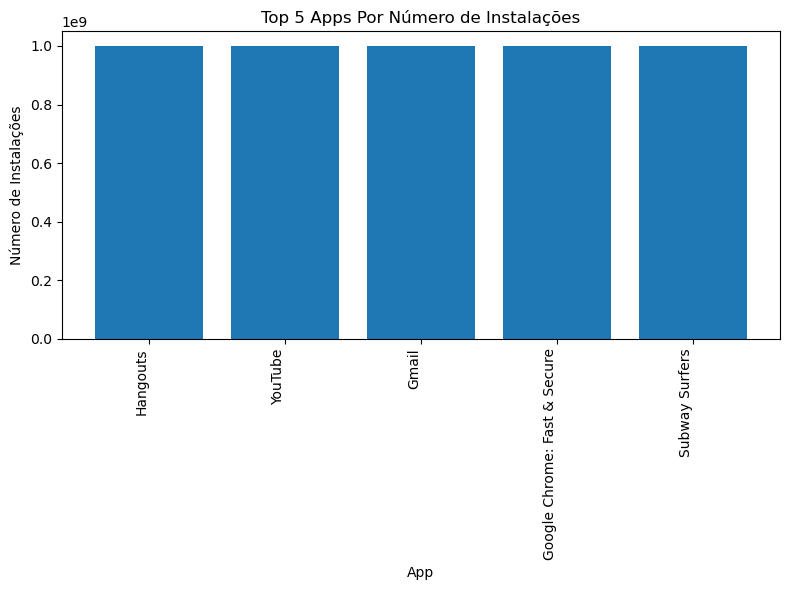

In [122]:
plt.figure(figsize=(8,6)) #ajuste do tamanho da figura
plt.bar(data['app'], data['installs']) #definição dos eixos X e Y
plt.title('Top 5 Apps Por Número de Instalações') #formatação de título
plt.xlabel('App') #formatação de rótulo do eixo X
plt.ylabel('Número de Instalações') #formatação de rótulo do eixo Y
plt.xticks(rotation = 90, ha = 'right') #Rotação dos valores do eixo X para melhor visualização
plt.tight_layout() #ajuste de layout evitando sobreposições
plt.show() #mostra o gráfico

# ------------------------------------------------------------------------------------------

**3. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes
		no dataset de acordo com a frequência em que elas aparecem.**

In [123]:
contagem_categorias = df1['category'].value_counts() #conta o número de ocorrências de cada categoria

In [127]:
contagem_categorias

category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

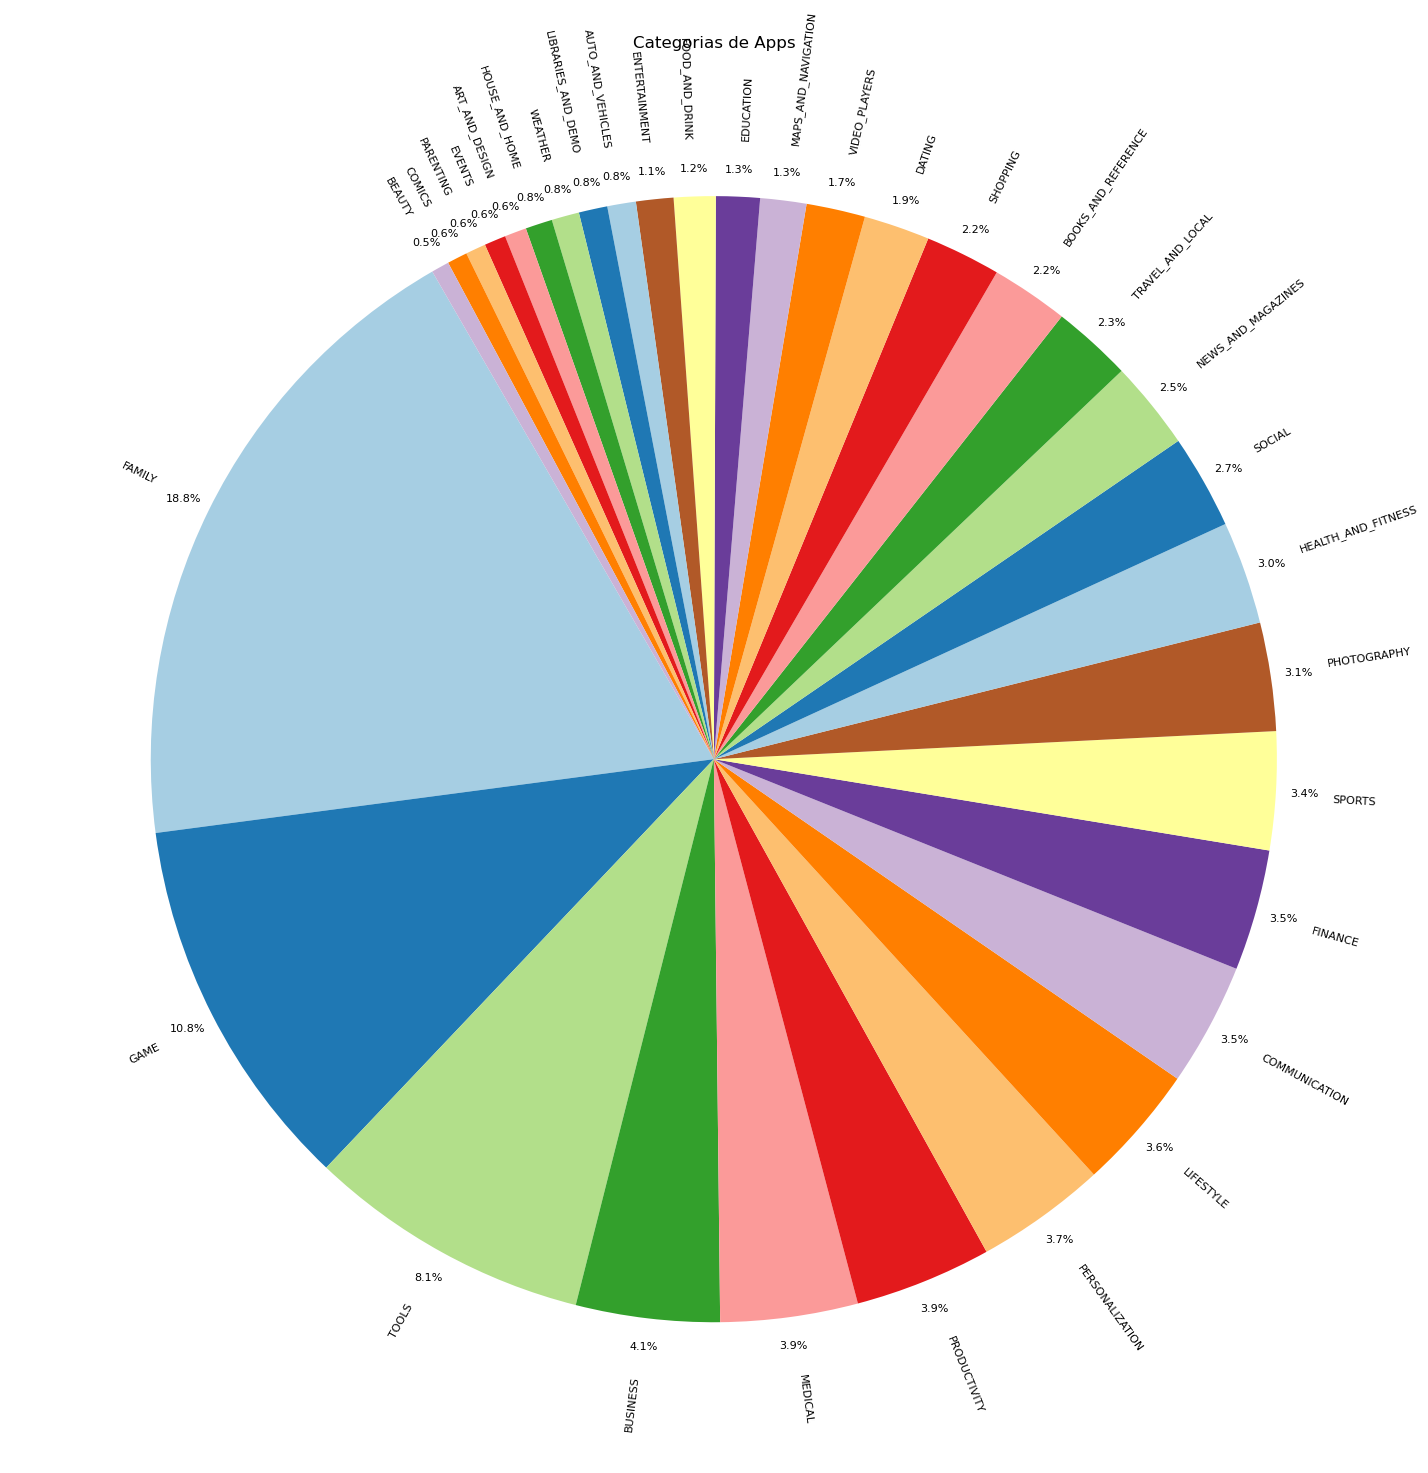

In [163]:
plt.figure(figsize=(45,15))
plt.pie( contagem_categorias, labels=contagem_categorias.index, 
        autopct = '%1.1f%%', startangle = 120, colors = plt.cm.Paired.colors, 
        rotatelabels = True, textprops={'fontsize': 8}, pctdistance = 1.05)
plt.title('Categorias de Apps')
plt.tight_layout()
plt.show()